In [1]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('weatherAUS.csv')

In [3]:
pd.set_option("display.max_columns", 100)

In [4]:
dt

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (8425, 23)


In [6]:
# Dataframe columns
dt.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
# To find types of data present in the dataset
dt.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column Date has ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08'] unique elements
****************************************************************************************************
This column Location has ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru'] unique elements
****************************************************************************************************
This column MinTemp has [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3

In [9]:
# Seeing for the null values in the dataset
dt.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

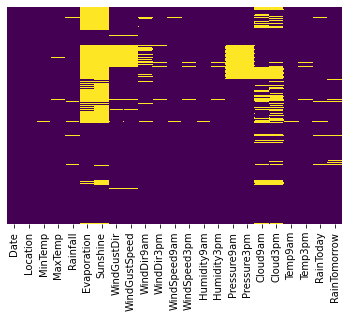

In [10]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [11]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [12]:
# To find the correlection in the dataset
dt.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


In [13]:
# Analysing the data 
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


<AxesSubplot:>

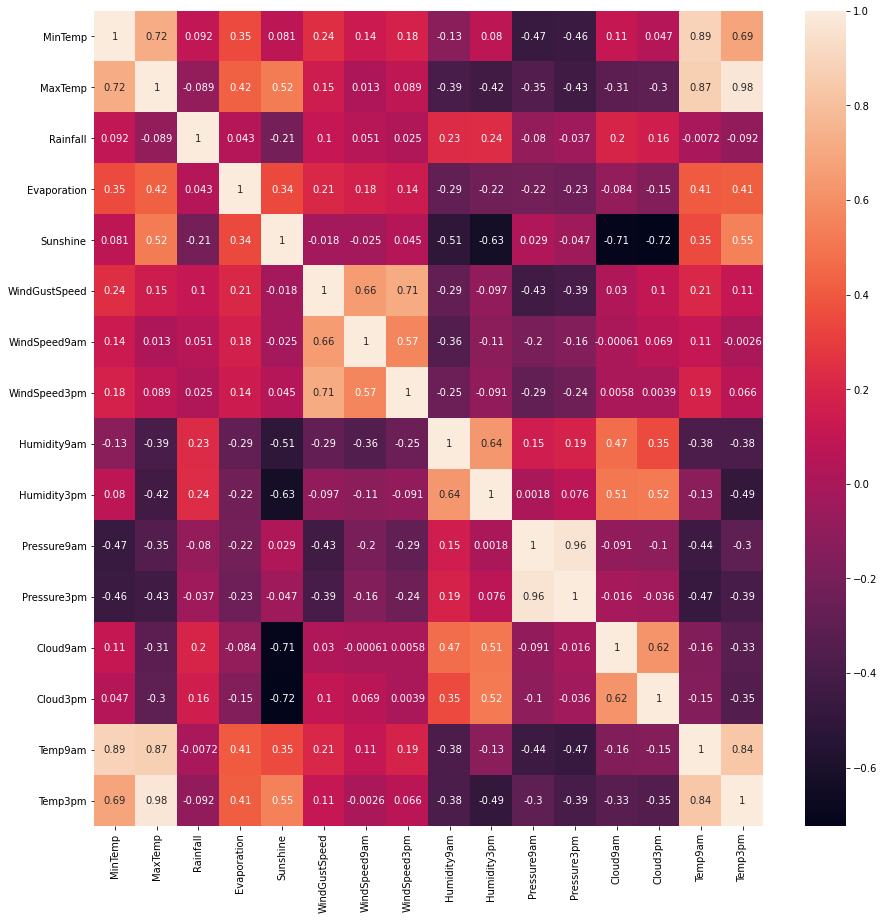

In [14]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [15]:
e['Rainfall'].sort_values()

Sunshine        -0.209654
Temp3pm         -0.092263
MaxTemp         -0.088906
Pressure9am     -0.080412
Pressure3pm     -0.037270
Temp9am         -0.007191
WindSpeed3pm     0.025185
Evaporation      0.043463
WindSpeed9am     0.051349
MinTemp          0.091642
WindGustSpeed    0.104999
Cloud3pm         0.159250
Cloud9am         0.195157
Humidity9am      0.231702
Humidity3pm      0.238730
Rainfall         1.000000
Name: Rainfall, dtype: float64

In [16]:
dt.drop_duplicates(keep='first',inplace=True)

In [17]:
# To see the skewness
dt.skew()

MinTemp          -0.083271
MaxTemp           0.326215
Rainfall         13.510350
Evaporation      10.216570
Sunshine         -0.637137
WindGustSpeed     0.724065
WindSpeed9am      0.952569
WindSpeed3pm      0.545718
Humidity9am      -0.255152
Humidity3pm       0.149786
Pressure9am       0.019836
Pressure3pm       0.038601
Cloud9am         -0.183033
Cloud3pm         -0.137486
Temp9am          -0.047034
Temp3pm           0.345725
dtype: float64

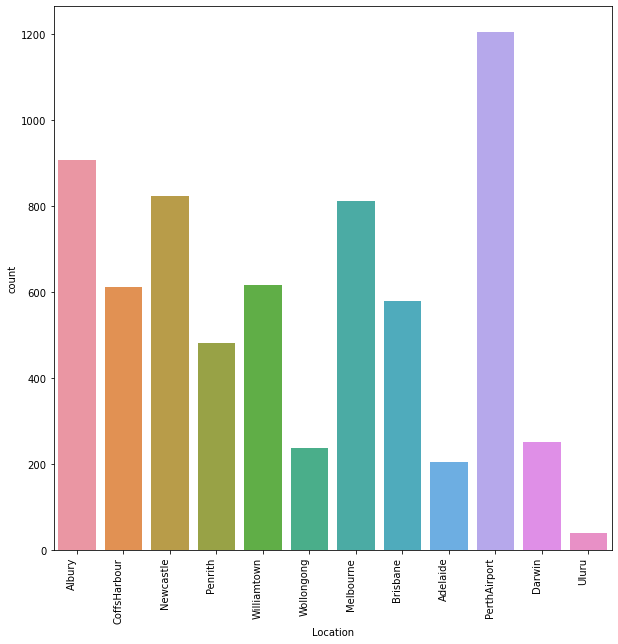

In [18]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Location'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

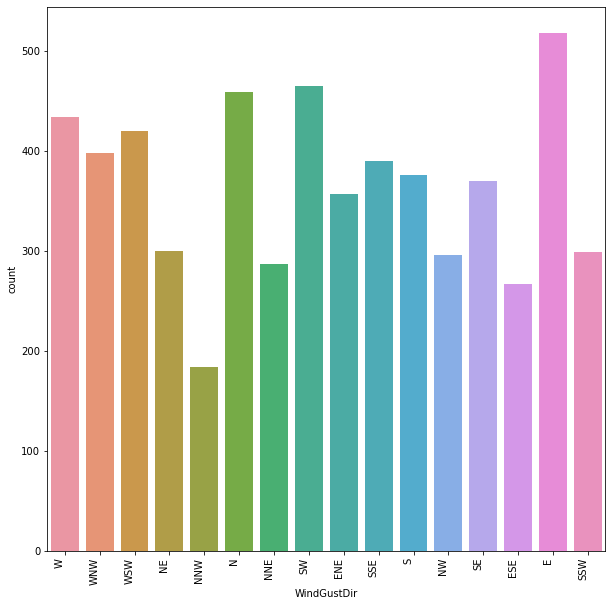

In [19]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['WindGustDir'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

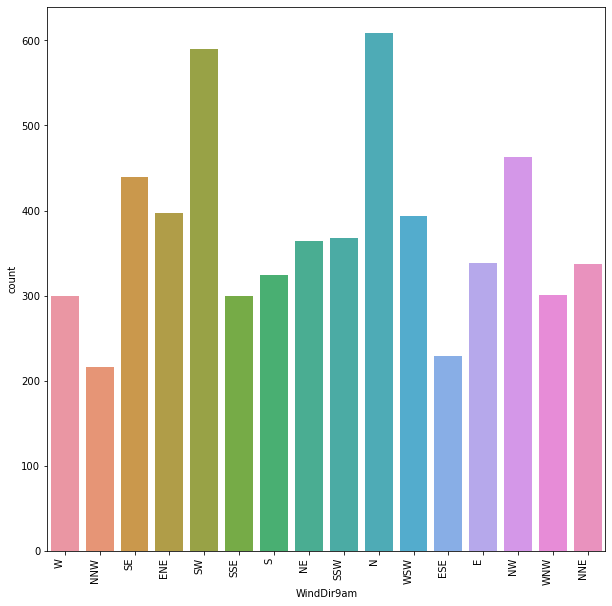

In [20]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['WindDir9am'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

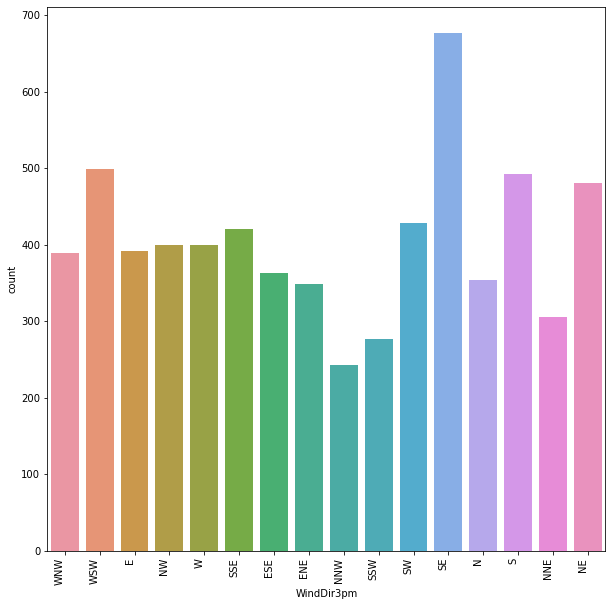

In [21]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['WindDir3pm'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

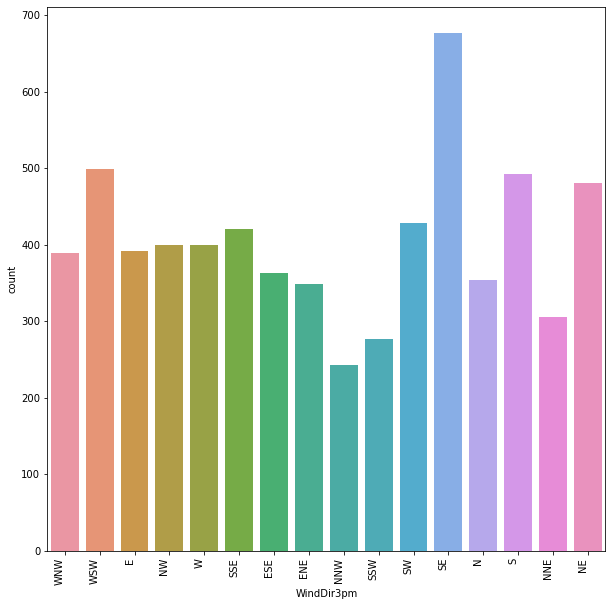

In [22]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['WindDir3pm'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

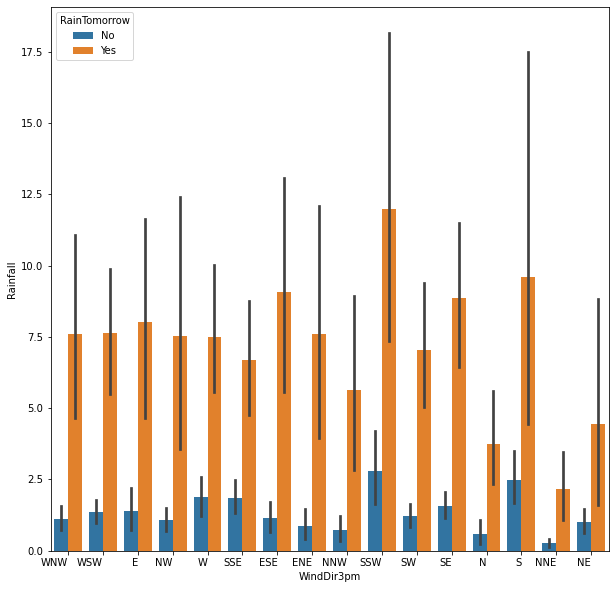

<function seaborn.categorical.countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)>

In [23]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='WindDir3pm', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.show()
sns.countplot

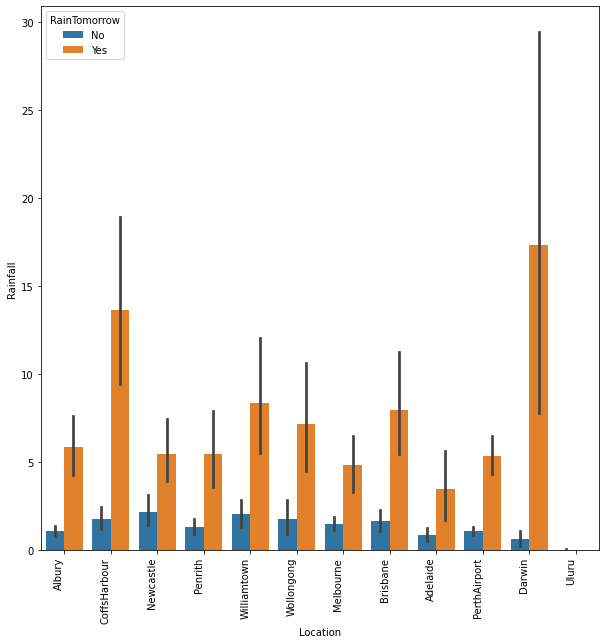

In [24]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='Location', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

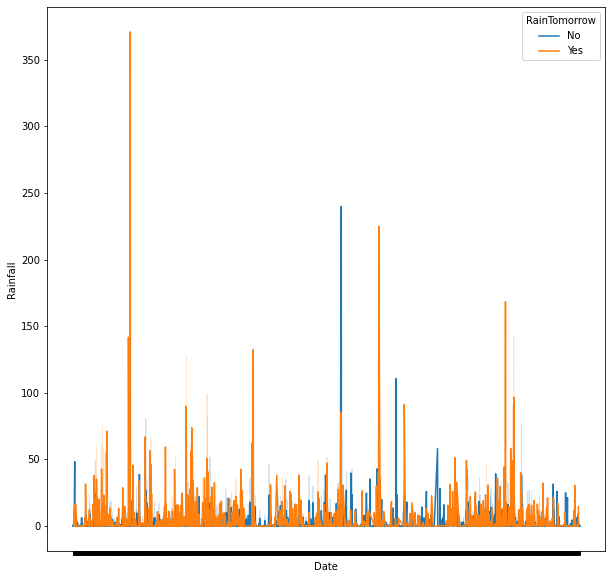

<function seaborn.relational.lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)>

In [25]:
plt.subplots(figsize=(10,10))
chart =sns.lineplot(x='Date', y='Rainfall',hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.lineplot

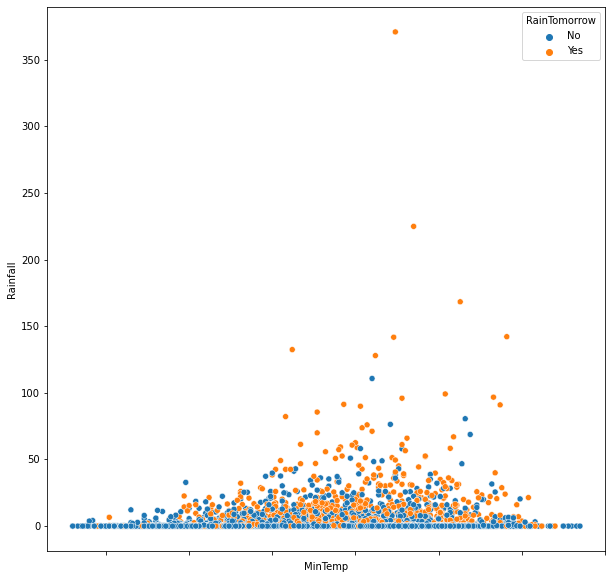

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [26]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='MinTemp', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

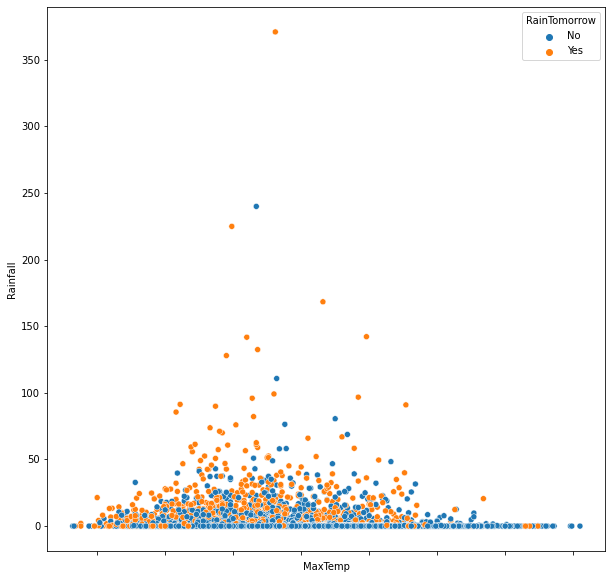

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [27]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='MaxTemp', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

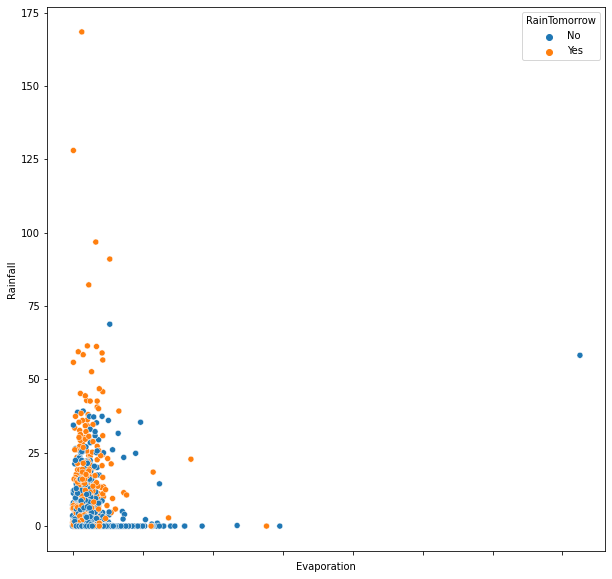

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [28]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Evaporation', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

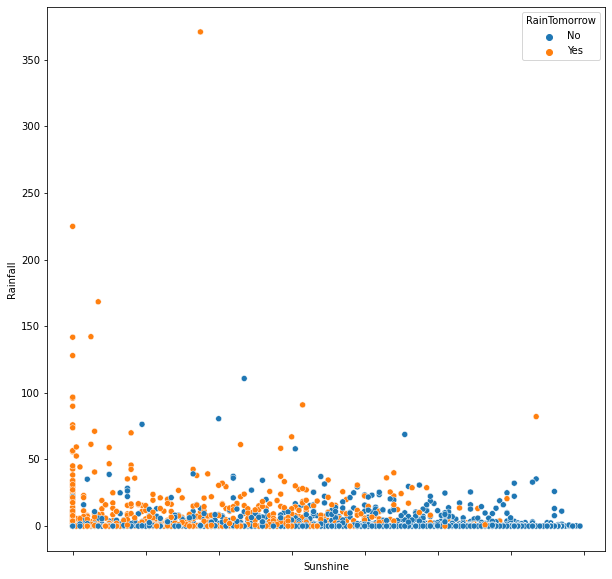

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [29]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Sunshine', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

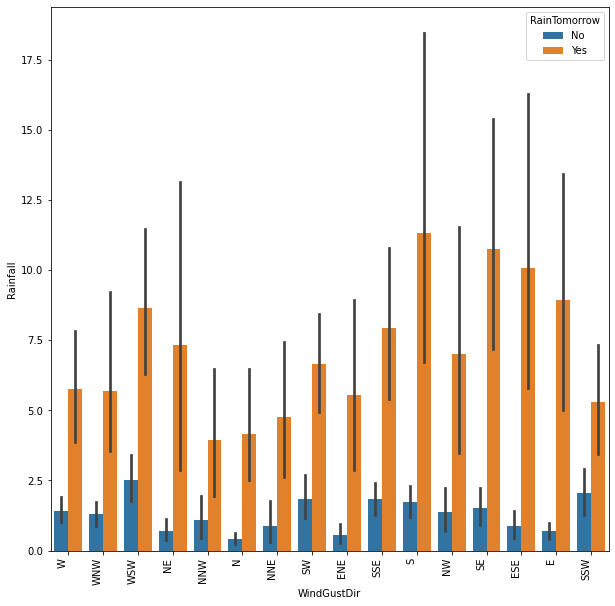

<function seaborn.categorical.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000000DADF575D30>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

In [30]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='WindGustDir', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.barplot

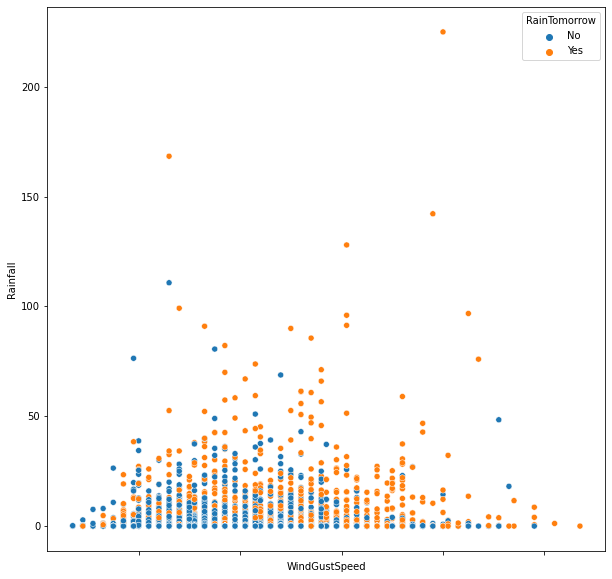

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [31]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='WindGustSpeed', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

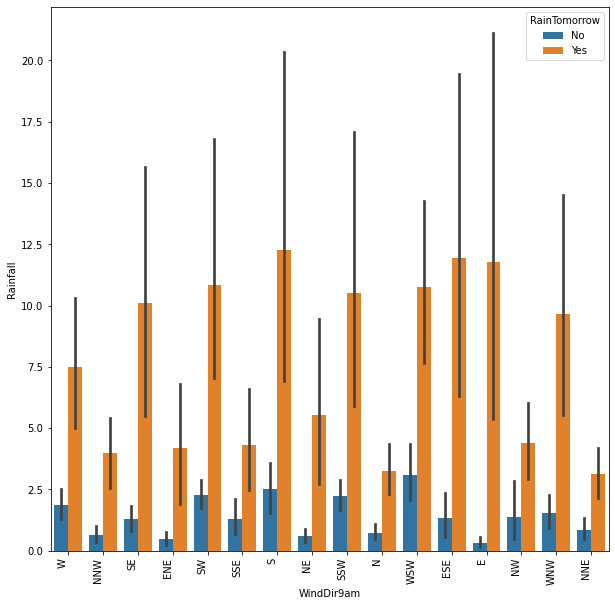

<function seaborn.categorical.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000000DADF575D30>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

In [32]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='WindDir9am', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.barplot

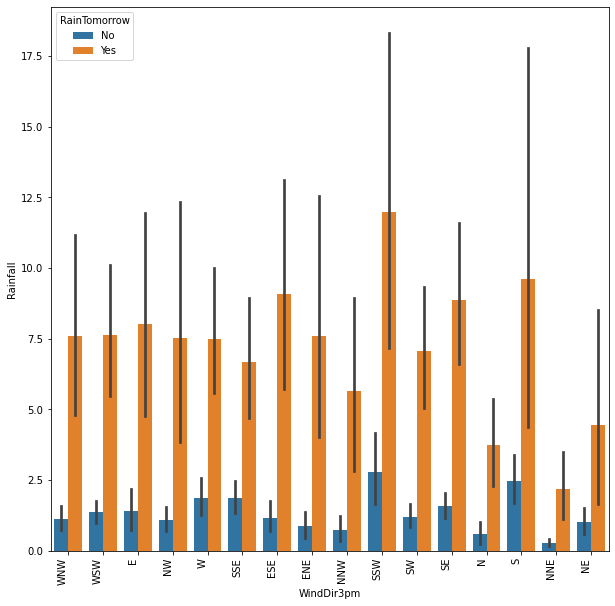

<function seaborn.categorical.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000000DADF575D30>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

In [33]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='WindDir3pm', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.barplot

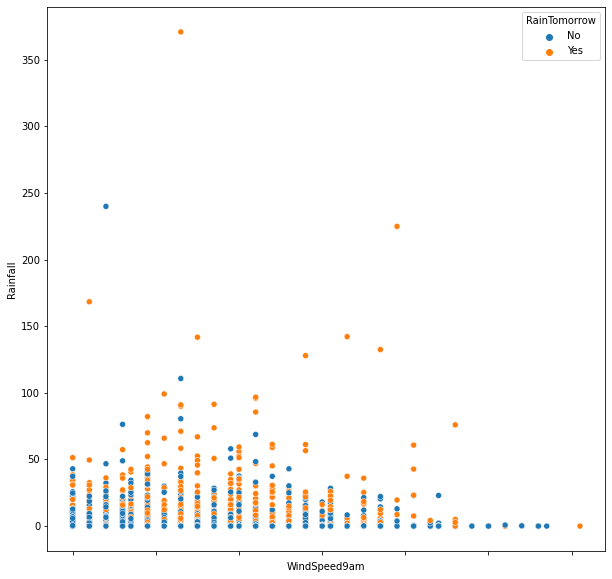

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [34]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='WindSpeed9am', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

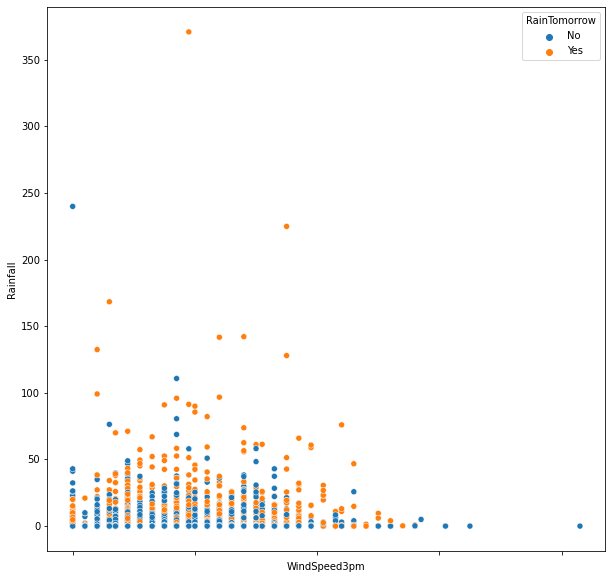

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [35]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='WindSpeed3pm', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

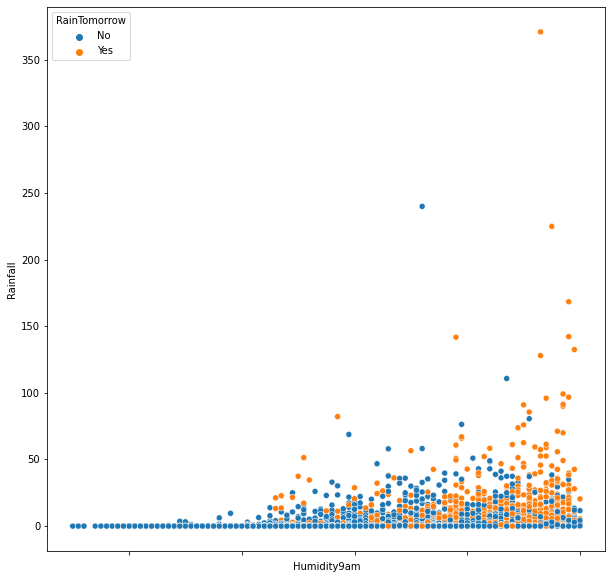

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [36]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Humidity9am', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

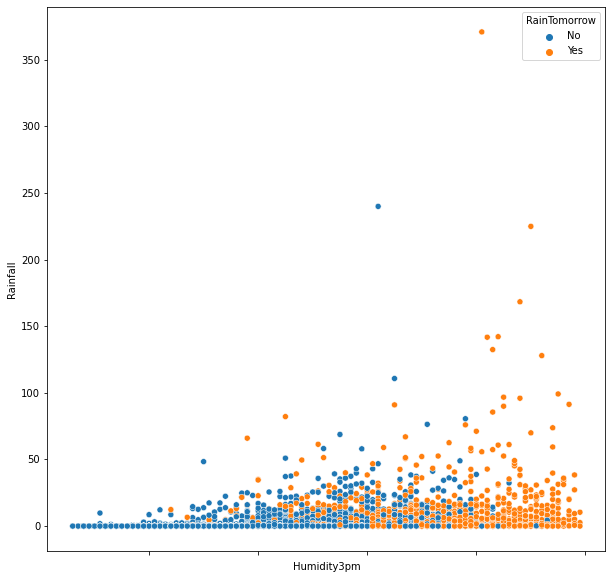

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [37]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Humidity3pm', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

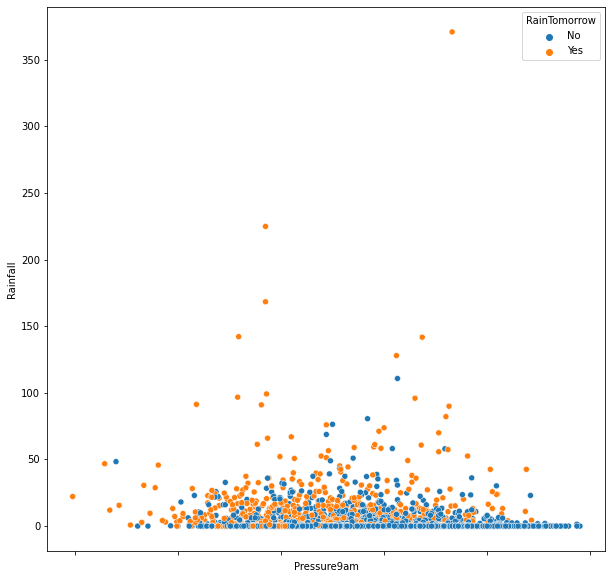

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [38]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Pressure9am', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

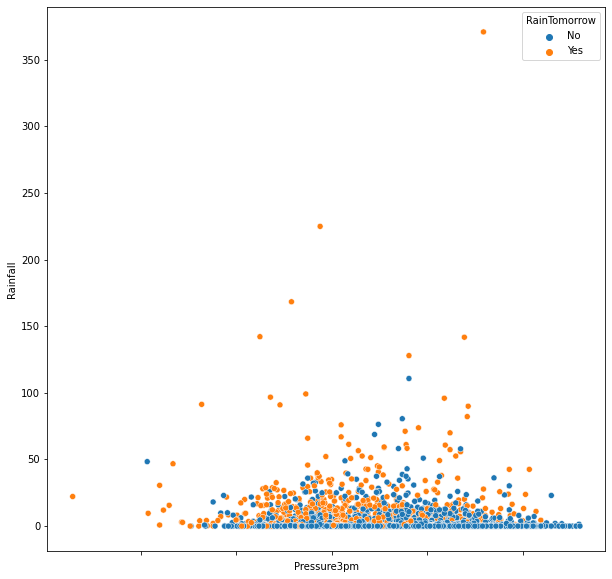

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [39]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Pressure3pm', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

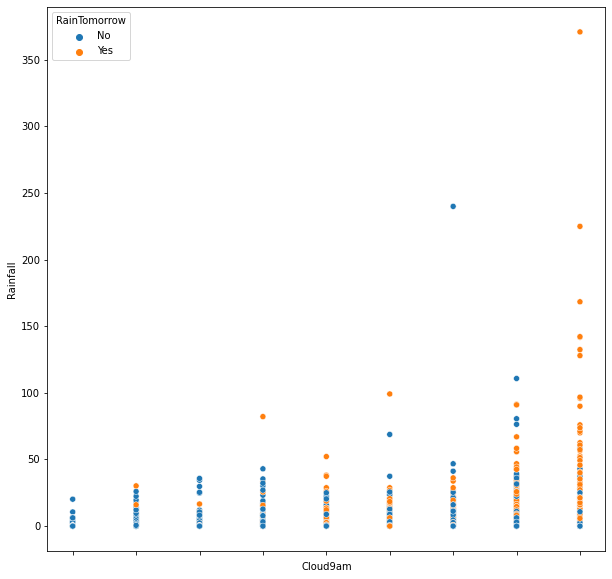

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [40]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Cloud9am', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

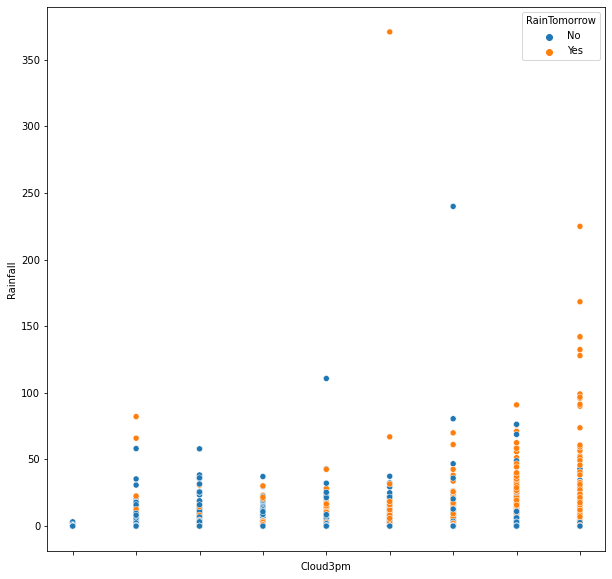

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [41]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Cloud3pm', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

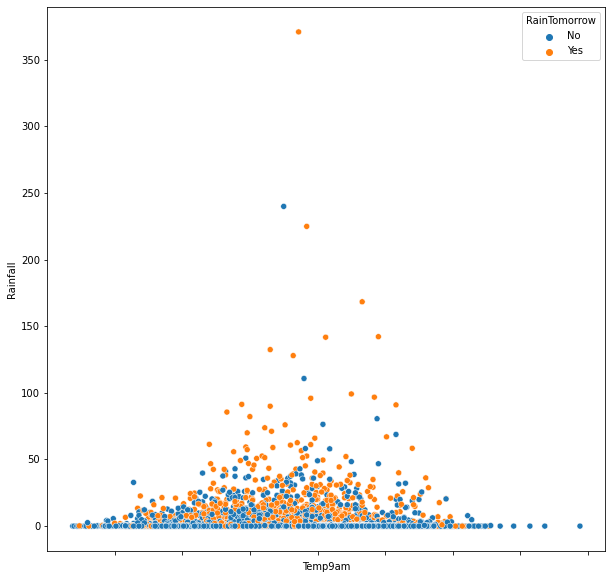

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [42]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Temp9am', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

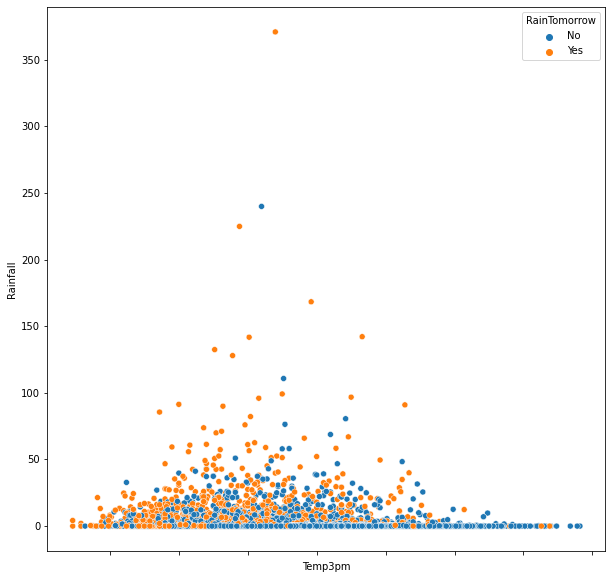

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

In [43]:
plt.subplots(figsize=(10,10))
chart =sns.scatterplot(x='Temp3pm', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.scatterplot

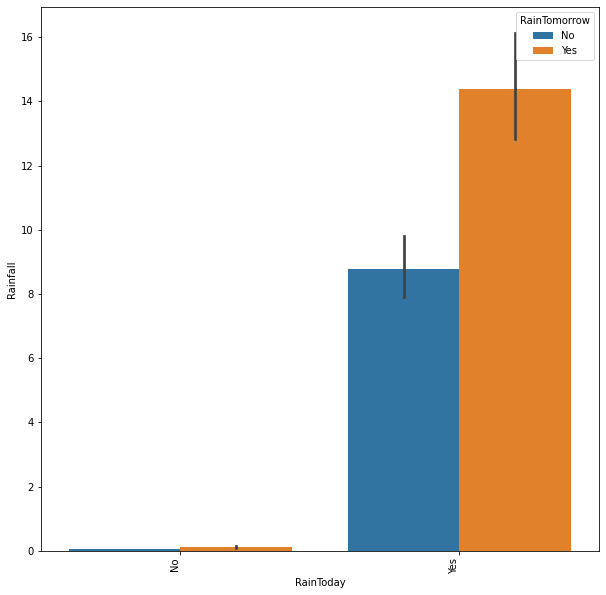

<function seaborn.categorical.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x000000DADF575D30>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

In [44]:
plt.subplots(figsize=(10,10))
chart =sns.barplot(x='RainToday', y='Rainfall', hue='RainTomorrow', data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()
sns.barplot

In [45]:
def rsi(dt, var):
    dt[var]=dt[var]
    r_s=dt[var].dropna().sample(dt[var].isnull().sum(),random_state=0)
    r_s.index=dt[dt[var].isnull()].index
    dt.loc[dt[var].isnull(),var]=r_s

In [46]:
rsi(dt, "Cloud9am")
rsi(dt, "Cloud3pm")
rsi(dt, "Evaporation")
rsi(dt, "Sunshine")

In [47]:
dt['MinTemp'] = dt['MinTemp'].fillna(dt['MinTemp'].median())
dt['MaxTemp'] = dt['MaxTemp'].fillna(dt['MaxTemp'].median())
dt['Rainfall'] = dt['Rainfall'].fillna(dt['Rainfall'].median())
dt['Evaporation'] = dt['Evaporation'].fillna(dt['Evaporation'].median())
dt['Sunshine'] = dt['Sunshine'].fillna(dt['Sunshine'].median())
dt['WindGustSpeed'] = dt['WindGustSpeed'].fillna(dt['WindGustSpeed'].median())
dt['WindSpeed9am'] = dt['WindSpeed9am'].fillna(dt['WindSpeed9am'].median())
dt['WindSpeed3pm'] = dt['WindSpeed3pm'].fillna(dt['WindSpeed3pm'].median())
dt['Humidity9am'] = dt['Humidity9am'].fillna(dt['Humidity9am'].median())
dt['Humidity3pm'] = dt['Humidity3pm'].fillna(dt['Humidity3pm'].median())
dt['Pressure9am'] = dt['Pressure9am'].fillna(dt['Pressure9am'].median())
dt['Pressure3pm'] = dt['Pressure3pm'].fillna(dt['Pressure3pm'].median())
dt['Cloud9am'] = dt['Cloud9am'].fillna(dt['Cloud9am'].median())
dt['Cloud3pm'] = dt['Cloud3pm'].fillna(dt['Cloud3pm'].median())
dt['Temp9am'] = dt['Temp9am'].fillna(dt['Temp9am'].median())
dt['Temp3pm'] = dt['Temp3pm'].fillna(dt['Temp3pm'].median())

In [48]:
dt['WindGustDir'].fillna(dt['WindGustDir'].value_counts().index[0],inplace=True)

In [49]:
dt['RainToday'].fillna(dt['RainToday'].value_counts().index[0],inplace=True)

In [50]:
dt['RainTomorrow'].fillna(dt['RainTomorrow'].value_counts().index[0],inplace=True)

In [51]:
dt['WindDir9am'].fillna(dt['WindDir9am'].value_counts().index[0],inplace=True)

In [52]:
dt['WindDir3pm'].fillna(dt['WindDir3pm'].value_counts().index[0],inplace=True)

In [53]:
#statistical Analysis

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

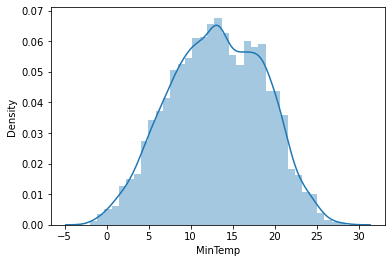

In [54]:
sns.distplot(dt['MinTemp'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

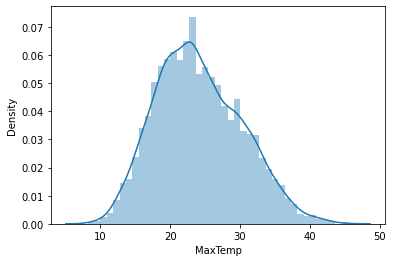

In [55]:
sns.distplot(dt['MaxTemp'])

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

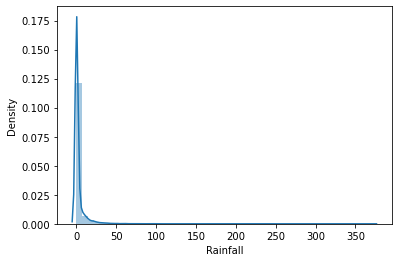

In [56]:
sns.distplot(dt['Rainfall'])

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

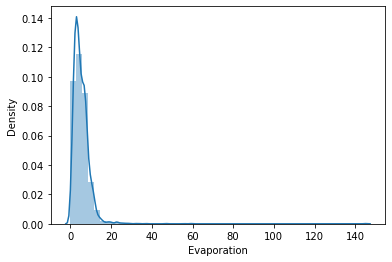

In [57]:
sns.distplot(dt['Evaporation'])

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

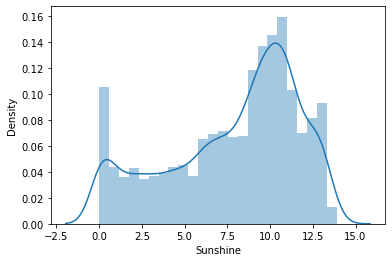

In [58]:
sns.distplot(dt['Sunshine'])

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

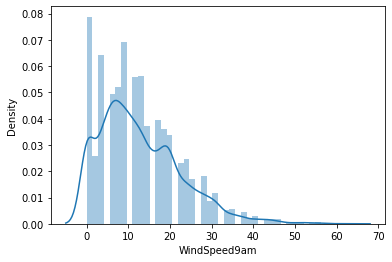

In [59]:
sns.distplot(dt['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

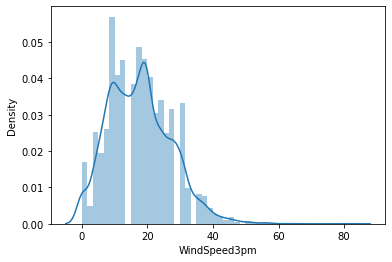

In [60]:
sns.distplot(dt['WindSpeed3pm'])

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

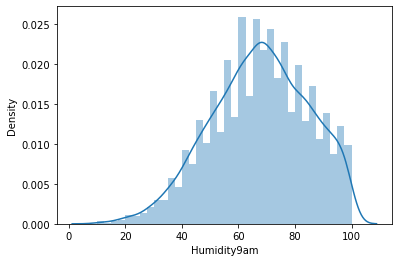

In [61]:
sns.distplot(dt['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

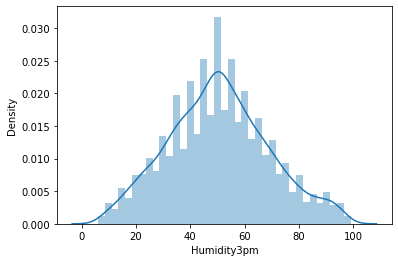

In [62]:
sns.distplot(dt['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

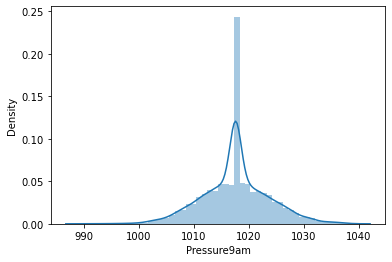

In [63]:
sns.distplot(dt['Pressure9am'])

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

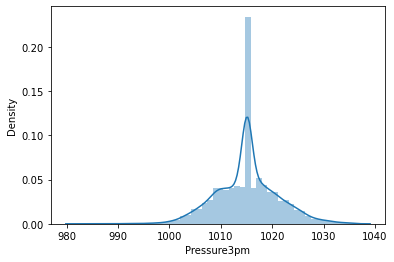

In [64]:
sns.distplot(dt['Pressure3pm'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

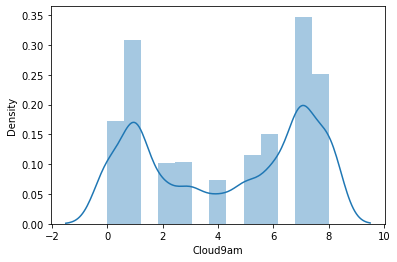

In [65]:
sns.distplot(dt['Cloud9am'])

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

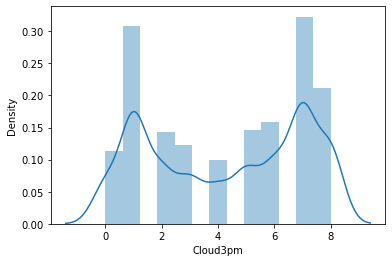

In [66]:
sns.distplot(dt['Cloud3pm'])

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

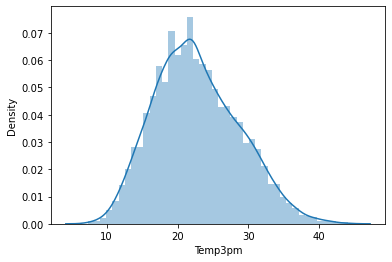

In [67]:
sns.distplot(dt['Temp3pm'])

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

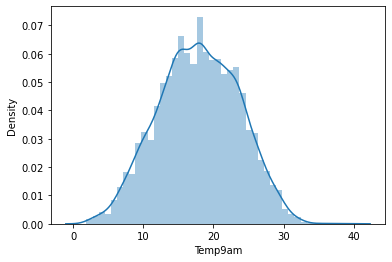

In [68]:
sns.distplot(dt['Temp9am'])

<AxesSubplot:xlabel='MinTemp'>

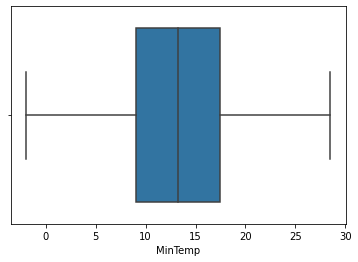

In [69]:
sns.boxplot(dt['MinTemp'])

<AxesSubplot:xlabel='MaxTemp'>

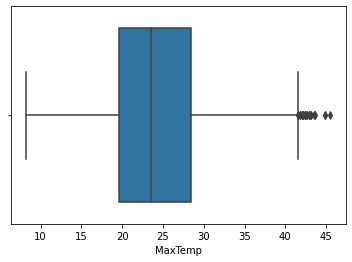

In [70]:
sns.boxplot(dt['MaxTemp'])

<AxesSubplot:xlabel='Rainfall'>

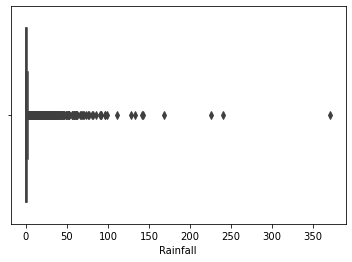

In [71]:
sns.boxplot(dt['Rainfall'])

<AxesSubplot:xlabel='Evaporation'>

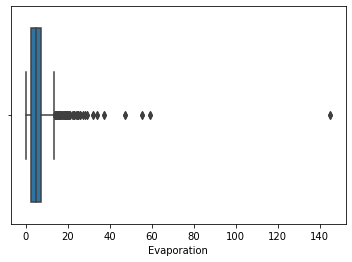

In [72]:
sns.boxplot(dt['Evaporation'])

<AxesSubplot:xlabel='Sunshine'>

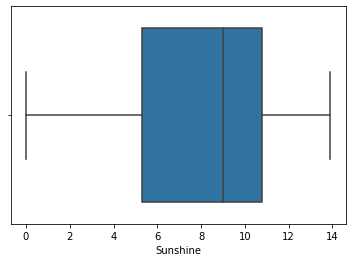

In [73]:
sns.boxplot(dt['Sunshine'])

<AxesSubplot:xlabel='WindSpeed9am'>

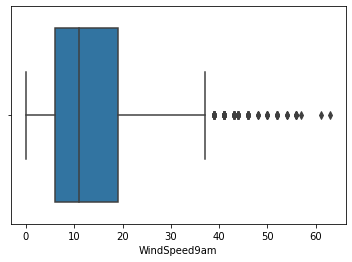

In [74]:
sns.boxplot(dt['WindSpeed9am'])

<AxesSubplot:xlabel='WindSpeed3pm'>

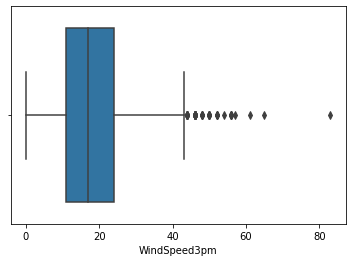

In [75]:
sns.boxplot(dt['WindSpeed3pm'])

<AxesSubplot:xlabel='Humidity9am'>

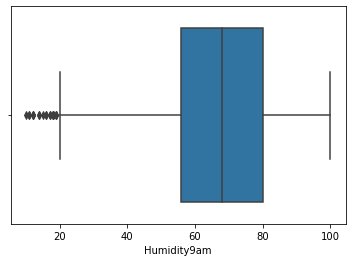

In [76]:
sns.boxplot(dt['Humidity9am'])

<AxesSubplot:xlabel='Humidity3pm'>

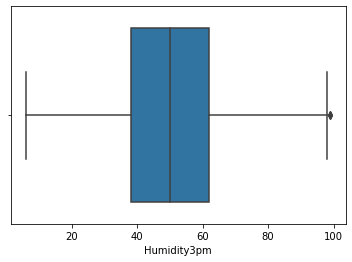

In [77]:
sns.boxplot(dt['Humidity3pm'])

<AxesSubplot:xlabel='Pressure9am'>

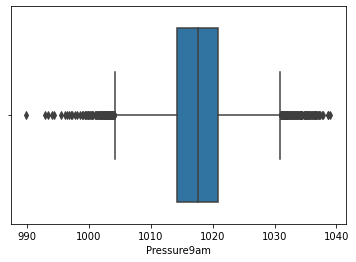

In [78]:
sns.boxplot(dt['Pressure9am'])

<AxesSubplot:xlabel='Pressure3pm'>

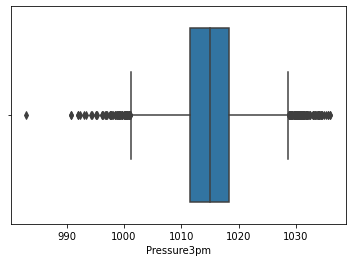

In [79]:
sns.boxplot(dt['Pressure3pm'])

<AxesSubplot:xlabel='Cloud9am'>

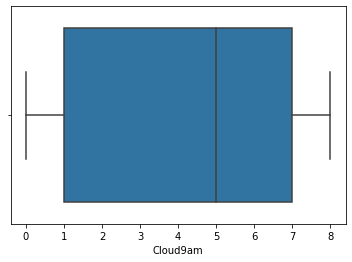

In [80]:
sns.boxplot(dt['Cloud9am'])

<AxesSubplot:xlabel='Cloud3pm'>

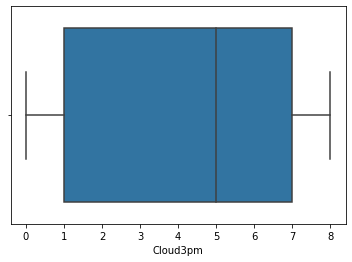

In [81]:
sns.boxplot(dt['Cloud3pm'])

<AxesSubplot:xlabel='Temp3pm'>

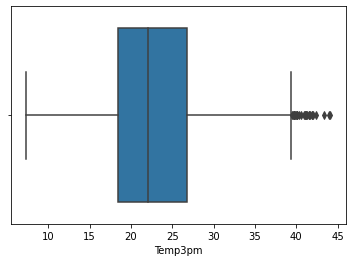

In [82]:
sns.boxplot(dt['Temp3pm'])

<AxesSubplot:xlabel='Temp9am'>

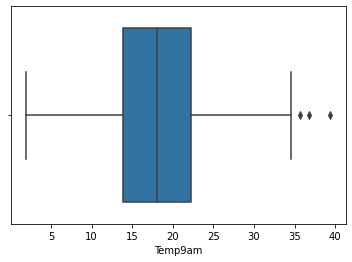

In [83]:
sns.boxplot(dt['Temp9am'])

In [84]:
# Seeing for the null values in the dataset
dt.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [85]:
dt

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.2,3.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,8.0,9.9,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.0,5.8,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,2.8,10.1,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,2.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,1.2,9.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,7.6,9.9,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,4.0,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,9.4,12.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,5.0,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,2.4,6.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,6.0,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [86]:
dt['Journey_year'] = dt['Date'].str.split('-').str[0].astype(int)
dt['Journey_month'] = dt['Date'].str.split('-').str[1].astype(int)
dt['Journey_date']=dt['Date'].str.split('-').str[2].astype(int)

In [87]:
dt

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Journey_year,Journey_month,Journey_date
0,2008-12-01,Albury,13.4,22.9,0.6,4.2,3.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,8.0,9.9,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.0,1.0,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,2.0,5.8,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,2.8,10.1,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,2.0,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,1.2,9.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,7.6,9.9,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,4.0,10.1,22.4,No,No,2017,6,21
8421,2017-06-22,Uluru,3.6,25.3,0.0,9.4,12.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,5.0,10.9,24.5,No,No,2017,6,22
8422,2017-06-23,Uluru,5.4,26.9,0.0,2.4,6.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,6.0,12.5,26.1,No,No,2017,6,23
8423,2017-06-24,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [88]:
dt.drop('Date',axis=1, inplace=True)

In [89]:
sns.pairplot(dt)

In [90]:
dt

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Journey_year,Journey_month,Journey_date
0,Albury,13.4,22.9,0.6,4.2,3.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,8.0,9.9,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.0,1.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,2.0,5.8,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,2.8,10.1,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,2.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,1.2,9.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,7.6,9.9,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,4.0,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.3,0.0,9.4,12.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,5.0,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.9,0.0,2.4,6.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,6.0,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [91]:
q1=dt['MaxTemp'].quantile(0.25)
q3=dt['MaxTemp'].quantile(0.75)
iqr=q3-q1

In [92]:
iqr

8.799999999999997

In [93]:
mt_h=(q3+(1.5*iqr))
mt_h

41.599999999999994

In [94]:
index=np.where(dt['MaxTemp']>mt_h)
index

(array([  44,   60,   61,   62,   67,   68,  405,  406,  407,  417, 2527,
        2859, 3271, 3277, 3278, 3291, 3301, 3302, 3766, 5331, 6320, 6321],
       dtype=int64),)

In [95]:
dt['MaxTemp'].iloc[index]=dt['MaxTemp'].mean()

<AxesSubplot:>

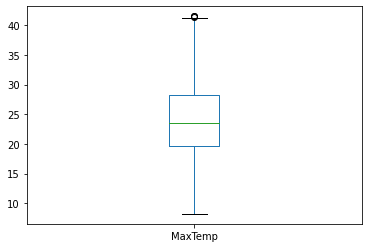

In [97]:
dt['MaxTemp'].plot(kind='box')

In [98]:
IQR=dt['Rainfall'].quantile(0.75)-dt['Rainfall'].quantile(0.25)
lower_bridge=dt['Rainfall'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['Rainfall'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.2000000000000002 2.0


In [99]:
dt.loc[dt['Rainfall']>=1.5,'Rainfall']=1.5
dt.loc[dt['Rainfall']<=-0.89,'Rainfall']=-0.89

<AxesSubplot:>

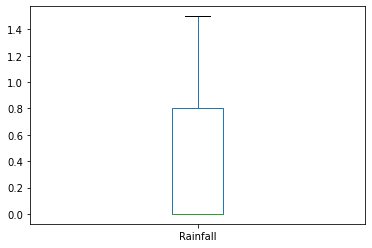

In [100]:
dt['Rainfall'].plot(kind='box')

In [101]:
IQR=dt['Evaporation'].quantile(0.75)-dt['Evaporation'].quantile(0.25)
lower_bridge=dt['Evaporation'].quantile(0.25)-(IQR*1.5)
upper_bridge=dt['Evaporation'].quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.0 13.600000000000001


In [102]:
dt.loc[dt['Evaporation']>=13.600000000000001,'Evaporation']=13.600000000000001
dt.loc[dt['Evaporation']<=-4.0,'Evaporation']=-4.0

<AxesSubplot:>

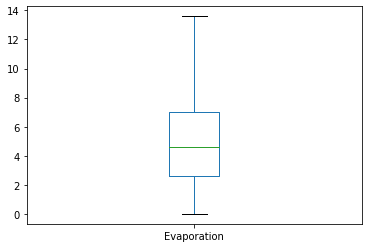

In [103]:
dt['Evaporation'].plot(kind='box')

In [104]:
IQR=dt['WindGustSpeed'].quantile(0.75)-dt['WindGustSpeed'].quantile(0.25)
lr_be=dt['WindGustSpeed'].quantile(0.25)-(IQR*1.5)
ur_be=dt['WindGustSpeed'].quantile(0.75)+(IQR*1.5)
print(lr_be, ur_be)

6.0 70.0


In [105]:
dt.loc[dt['WindGustSpeed']>=70,'WindGustSpeed']=70
dt.loc[dt['WindGustSpeed']<=6.0,'WindGustSpeed']=6.0

<AxesSubplot:>

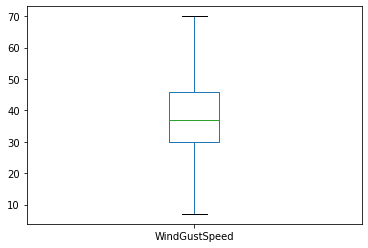

In [106]:
dt['WindGustSpeed'].plot(kind='box')

In [107]:
IQR=dt['WindSpeed9am'].quantile(0.75)-dt['WindSpeed9am'].quantile(0.25)
lr_be=dt['WindSpeed9am'].quantile(0.25)-(IQR*1.5)
ur_be=dt['WindSpeed9am'].quantile(0.75)+(IQR*1.5)
print(lr_be, ur_be)

-13.5 38.5


In [108]:
dt.loc[dt['WindSpeed9am']>=38.5,'WindSpeed9am']=38.5
dt.loc[dt['WindSpeed9am']<=-13.5,'WindSpeed9am']=-13.5

<AxesSubplot:>

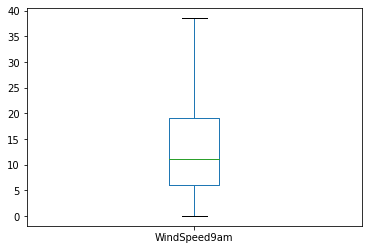

In [109]:
dt['WindSpeed9am'].plot(kind='box')

In [110]:
IQR=dt['WindSpeed3pm'].quantile(0.75)-dt['WindSpeed3pm'].quantile(0.25)
lr_be=dt['WindSpeed3pm'].quantile(0.25)-(IQR*1.5)
ur_be=dt['WindSpeed3pm'].quantile(0.75)+(IQR*1.5)
print(lr_be, ur_be)

-8.5 43.5


In [111]:
dt.loc[dt['WindSpeed3pm']>=43.5,'WindSpeed3pm']=43.5
dt.loc[dt['WindSpeed3pm']<=-8.5,'WindSpeed3pm']=-8.5

<AxesSubplot:>

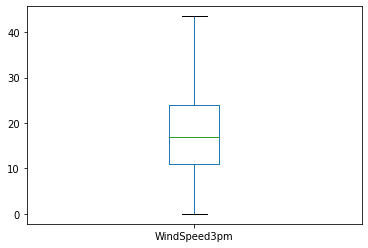

In [112]:
dt['WindSpeed3pm'].plot(kind='box')

In [113]:
IQR=dt['Humidity9am'].quantile(0.75)-dt['Humidity9am'].quantile(0.25)
lr_be=dt['Humidity9am'].quantile(0.25)-(IQR*1.5)
ur_be=dt['Humidity9am'].quantile(0.75)+(IQR*1.5)
print(lr_be, ur_be)

20.0 116.0


In [114]:
dt.loc[dt['Humidity9am']>=116.0,'Humidity9am']=116.0
dt.loc[dt['Humidity9am']<=20,'Humidity9am']=20

<AxesSubplot:>

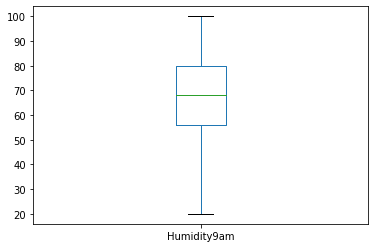

In [115]:
dt['Humidity9am'].plot(kind='box')

In [116]:
IQR=dt['Pressure9am'].quantile(0.75)-dt['Pressure9am'].quantile(0.25)
lr_be=dt['Pressure9am'].quantile(0.25)-(IQR*1.5)
ur_be=dt['Pressure9am'].quantile(0.75)+(IQR*1.5)
print(lr_be, ur_be)

1004.1500000000001 1030.9499999999998


In [117]:
dt.loc[dt['Pressure9am']>=1030.9499999999998,'Pressure9am']=1030.9499999999998
dt.loc[dt['Pressure9am']<=1004.1500000000001,'Pressure9am']=1004.1500000000001

<AxesSubplot:>

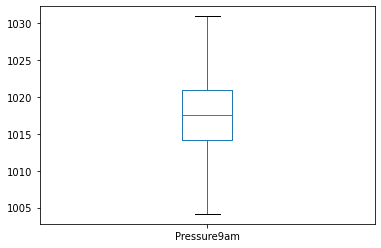

In [118]:
dt['Pressure9am'].plot(kind='box')

In [119]:
IQR=dt['Pressure3pm'].quantile(0.75)-dt['Pressure3pm'].quantile(0.25)
lr_be=dt['Pressure3pm'].quantile(0.25)-(IQR*1.5)
ur_be=dt['Pressure3pm'].quantile(0.75)+(IQR*1.5)
print(lr_be, ur_be)

1001.1500000000001 1028.75


In [120]:
dt.loc[dt['Pressure3pm']>=1028.75,'Pressure3pm']=1028.75
dt.loc[dt['Pressure3pm']<=1001.1500000000001,'Pressure3pm']=1001.1500000000001

<AxesSubplot:>

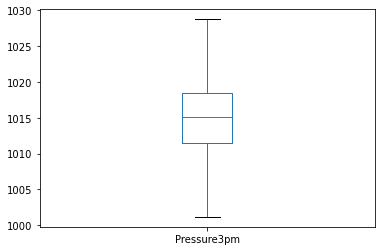

In [121]:
dt['Pressure3pm'].plot(kind='box')

In [129]:
IQR=dt['Temp9am'].quantile(0.75)-dt['Temp9am'].quantile(0.25)
lr_be=dt['Temp9am'].quantile(0.25)-(IQR*1.5)
ur_be=dt['Temp9am'].quantile(0.75)+(IQR*1.5)
print(lr_be, ur_be)

1.450000000000001 34.65


In [130]:
dt.loc[dt['Temp9am']>=34.65,'Temp9am']=34.65
dt.loc[dt['Temp9am']<=1.450000000000001,'Temp9am']=1.450000000000001

<AxesSubplot:>

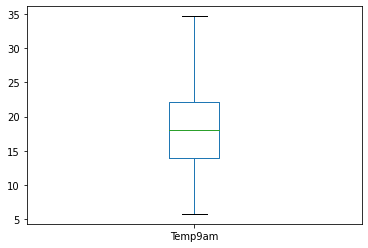

In [131]:
dt['Temp9am'].plot(kind='box')

In [127]:
IQR=dt['Temp3pm'].quantile(0.75)-dt['Temp3pm'].quantile(0.25)
lr_be=dt['Temp3pm'].quantile(0.25)-(IQR*1.5)
ur_be=dt['Temp3pm'].quantile(0.75)+(IQR*1.5)
print(lr_be, ur_be)

5.799999999999995 39.400000000000006


In [132]:
dt.loc[dt['Temp3pm']>=39.400000000000006,'Temp3pm']=39.400000000000006
dt.loc[dt['Temp3pm']<=5.799999999999995,'Temp3pm']=5.799999999999995

<AxesSubplot:>

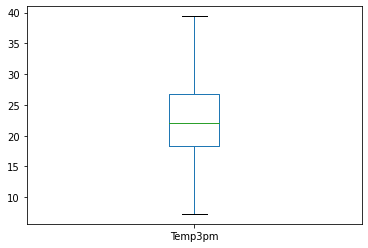

In [133]:
dt['Temp3pm'].plot(kind='box')

In [134]:
dt

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Journey_year,Journey_month,Journey_date
0,Albury,13.4,22.9,0.6,4.2,3.8,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,8.0,9.9,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.0,1.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,2.0,5.8,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,2.8,10.1,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,2.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,1.2,9.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,7.6,9.9,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,4.0,10.1,22.4,No,No,2017,6,21
8421,Uluru,3.6,25.3,0.0,9.4,12.1,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,5.0,10.9,24.5,No,No,2017,6,22
8422,Uluru,5.4,26.9,0.0,2.4,6.7,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,6.0,12.5,26.1,No,No,2017,6,23
8423,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [135]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [136]:
# Assigning to a variable
le=LabelEncoder()

In [137]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['RainToday']=le.fit_transform(dt['RainToday'])
dt['RainTomorrow']=le.fit_transform(dt['RainTomorrow'])
dt['Location']=le.fit_transform(dt['Location'])
dt['WindGustDir']=le.fit_transform(dt['WindGustDir'])
dt['WindDir9am']=le.fit_transform(dt['WindDir9am'])
dt['WindDir3pm']=le.fit_transform(dt['WindDir3pm'])

In [138]:
dt

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Journey_year,Journey_month,Journey_date
0,1,13.4,22.9,0.6,4.2,3.8,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,8.0,9.9,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.0,1.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,2.0,5.8,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,2.8,10.1,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,2.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,1.2,9.5,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,7.6,9.9,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,4.0,10.1,22.4,0,0,2017,6,21
8421,9,3.6,25.3,0.0,9.4,12.1,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,1.0,5.0,10.9,24.5,0,0,2017,6,22
8422,9,5.4,26.9,0.0,2.4,6.7,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,6.0,12.5,26.1,0,0,2017,6,23
8423,9,7.8,27.0,0.0,4.0,0.0,9,28.0,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


In [139]:
# Assignment of X and y
X=dt.drop(['RainTomorrow'], axis=1)
y=dt.RainTomorrow

In [140]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [142]:
#Upsmapling have to be performed to remove the biases
from imblearn.over_sampling import SMOTE

In [143]:
osmp=SMOTE(0.75)

In [144]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y)

In [145]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [146]:
# Importing PCA components
from sklearn.decomposition import PCA

In [147]:
pca=PCA()
pca.fit_transform(X_train_ns)

array([[-1.13542805, -1.21234466, -0.22730723, ..., -0.03349807,
        -0.02903902, -0.05253148],
       [ 2.20206579,  1.74272759,  2.49059595, ..., -0.06277782,
        -0.1750468 ,  0.09519975],
       [ 0.97421039, -0.68839639, -0.64986123, ..., -0.08841449,
        -0.10763827, -0.06882276],
       ...,
       [ 2.92546948, -0.49009217, -2.7153902 , ...,  0.10049001,
        -0.09874111, -0.06188395],
       [-0.45532564,  3.12295198, -1.30794174, ..., -0.2595528 ,
         0.00372487,  0.03472354],
       [-1.04949027, -0.34159268, -0.0421976 , ...,  0.14828503,
        -0.05762583,  0.07830093]])

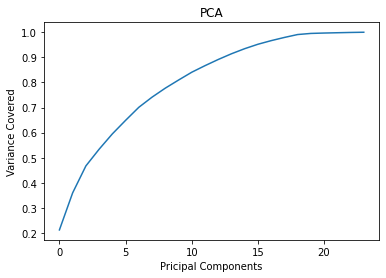

In [148]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [149]:
pca=PCA(n_components=16)
new_pcomp=pca.fit_transform(X_train_ns)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                          'PC11','PC12','PC13','PC14','PC15','PC16'])

In [150]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.135428,-1.212345,-0.227307,-0.957713,1.439966,0.201733,0.599454,1.223443,-0.684488,-0.567939,-0.421051,0.331331,0.193788,-1.693759,-0.301814,-0.382510
1,2.202066,1.742728,2.490596,-0.228309,-0.712682,-1.347336,0.384010,0.000877,1.732138,0.533445,-1.642334,-0.860884,-0.009927,0.144174,0.169002,0.880018
2,0.974210,-0.688396,-0.649861,0.341482,1.074518,-0.648549,-0.108103,0.002517,0.136669,-2.247429,0.351134,-1.205651,0.941931,1.254019,-1.243671,0.417937
3,-2.300738,-0.366904,-3.223452,-1.029341,1.810196,-0.516614,0.763973,-0.554429,-0.124738,-0.659434,-0.128164,-0.979377,0.426706,-0.319428,0.214720,-0.077529
4,2.834916,-0.884019,-2.738085,0.683897,-0.613139,-0.467742,0.438781,-1.764805,-0.899250,-0.907332,0.554343,0.183820,-0.152092,-1.094448,-0.448052,0.621694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,0.942347,-0.054109,-2.715752,0.613002,0.418953,-1.550319,1.127975,0.197441,-0.283898,0.297820,0.123052,-0.515744,-0.263692,-0.897662,-0.722490,0.085607
6801,-0.959274,2.442842,-0.497546,0.506799,-0.629302,-0.702458,-1.311181,0.884206,-0.859796,-0.162051,1.011793,-0.382013,0.681231,-0.641974,-0.349783,-0.590263
6802,2.925469,-0.490092,-2.715390,-0.905390,0.043776,1.149996,0.788112,-0.970669,-0.468977,0.581542,-0.280340,0.127367,0.456352,-0.034750,-0.707606,-0.117264
6803,-0.455326,3.122952,-1.307942,-1.527850,0.857116,0.212759,-0.683698,0.482207,1.368894,-1.117359,0.288590,0.629503,-0.038615,0.374829,0.431690,0.084096


In [151]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [152]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7634092578986039 random_state 1
accuracy of the optimum model 0.7634092578986039 random_state 1
accuracy of the model 0.7604702424687729 random_state 2
accuracy of the model 0.7744305657604702 random_state 3
accuracy of the optimum model 0.7744305657604702 random_state 3
accuracy of the model 0.75165319617928 random_state 4
accuracy of the model 0.783982365907421 random_state 5
accuracy of the optimum model 0.783982365907421 random_state 5
accuracy of the model 0.778104335047759 random_state 6
accuracy of the model 0.7612049963262307 random_state 7
accuracy of the model 0.778104335047759 random_state 8
accuracy of the model 0.7773695811903012 random_state 9
accuracy of the model 0.7788390889052168 random_state 10
accuracy of the model 0.7847171197648788 random_state 11
accuracy of the optimum model 0.7847171197648788 random_state 11
accuracy of the model 0.772226304188097 random_state 12
accuracy of the model 0.7575312270389419 random_state 13
accuracy of the mo

In [153]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8016164584864071 in random state 440


In [154]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train, y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8119030124908155 random_state 1
accuracy of the optimum model 0.8119030124908155 random_state 1
accuracy of the model 0.8390889052167524 random_state 2
accuracy of the optimum model 0.8390889052167524 random_state 2
accuracy of the model 0.8295371050698016 random_state 3
accuracy of the model 0.8243938280675973 random_state 4
accuracy of the model 0.8251285819250551 random_state 5
accuracy of the model 0.8368846436443791 random_state 6
accuracy of the model 0.8332108743570904 random_state 7
accuracy of the model 0.8148420279206466 random_state 8
accuracy of the model 0.8280675973548861 random_state 9
accuracy of the model 0.8317413666421749 random_state 10
accuracy of the model 0.8185157972079353 random_state 11
accuracy of the model 0.8192505510653931 random_state 12
accuracy of the model 0.8067597354886114 random_state 13
accuracy of the model 0.807494489346069 random_state 14
accuracy of the model 0.8243938280675973 random_state 15
accuracy of the model 0.825

In [155]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8501102130786187 in random state 133


In [156]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    de=DecisionTreeClassifier()
    de.fit(x_train, y_train)
    pred=de.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7744305657604702 random_state 1
accuracy of the optimum model 0.7744305657604702 random_state 1
accuracy of the model 0.783982365907421 random_state 2
accuracy of the optimum model 0.783982365907421 random_state 2
accuracy of the model 0.7891256429096253 random_state 3
accuracy of the optimum model 0.7891256429096253 random_state 3
accuracy of the model 0.7817781043350478 random_state 4
accuracy of the model 0.7744305657604702 random_state 5
accuracy of the model 0.7773695811903012 random_state 6
accuracy of the model 0.7964731814842028 random_state 7
accuracy of the optimum model 0.7964731814842028 random_state 7
accuracy of the model 0.7817781043350478 random_state 8
accuracy of the model 0.78104335047759 random_state 9
accuracy of the model 0.7832476120499633 random_state 10
accuracy of the model 0.7795738427626745 random_state 11
accuracy of the model 0.7854518736223365 random_state 12
accuracy of the model 0.7788390889052168 random_state 13
accuracy of the 

In [157]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.813372520205731 in random state 594


In [158]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    xe=XGBRFClassifier()
    xe.fit(x_train, y_train)
    pred=xe.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

[12:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7913299044819986 random_state 1
accuracy of the optimum model 0.7913299044819986 random_state 1
[12:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.769287288758266 random_state 2
[12:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was 

In [159]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8163115356355621 in random state 155


In [160]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    pred=ad.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7714915503306392 random_state 1
accuracy of the optimum model 0.7714915503306392 random_state 1
accuracy of the model 0.7590007347538574 random_state 2
accuracy of the model 0.7759000734753857 random_state 3
accuracy of the optimum model 0.7759000734753857 random_state 3
accuracy of the model 0.7384276267450404 random_state 4
accuracy of the model 0.772226304188097 random_state 5
accuracy of the model 0.775165319617928 random_state 6
accuracy of the model 0.7619397501836884 random_state 7
accuracy of the model 0.7766348273328435 random_state 8
accuracy of the optimum model 0.7766348273328435 random_state 8
accuracy of the model 0.766348273328435 random_state 9
accuracy of the model 0.7773695811903012 random_state 10
accuracy of the optimum model 0.7773695811903012 random_state 10
accuracy of the model 0.7795738427626745 random_state 11
accuracy of the optimum model 0.7795738427626745 random_state 11
accuracy of the model 0.7744305657604702 random_state 12
accura

In [161]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.804555473916238 in random state 718


In [162]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    gc=GradientBoostingClassifier()
    gc.fit(x_train, y_train)
    pred=gc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7942689199118296 random_state 1
accuracy of the optimum model 0.7942689199118296 random_state 1
accuracy of the model 0.7729610580455547 random_state 2
accuracy of the model 0.7957384276267451 random_state 3
accuracy of the optimum model 0.7957384276267451 random_state 3
accuracy of the model 0.7656135194709772 random_state 4
accuracy of the model 0.8052902277736959 random_state 5
accuracy of the optimum model 0.8052902277736959 random_state 5
accuracy of the model 0.7927994121969141 random_state 6
accuracy of the model 0.7950036737692873 random_state 7
accuracy of the model 0.804555473916238 random_state 8
accuracy of the model 0.7979426891991183 random_state 9
accuracy of the model 0.8030859662013226 random_state 10
accuracy of the model 0.7957384276267451 random_state 11
accuracy of the model 0.8008817046289493 random_state 12
accuracy of the model 0.775165319617928 random_state 13
accuracy of the model 0.7942689199118296 random_state 14
accuracy of the model

In [163]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8221895664952241 in random state 300


In [164]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    sc=SVC()
    sc.fit(x_train, y_train)
    pred=sc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8023512123438648 random_state 1
accuracy of the optimum model 0.8023512123438648 random_state 1
accuracy of the model 0.8096987509184423 random_state 2
accuracy of the optimum model 0.8096987509184423 random_state 2
accuracy of the model 0.8207200587803086 random_state 3
accuracy of the optimum model 0.8207200587803086 random_state 3
accuracy of the model 0.7920646583394563 random_state 4
accuracy of the model 0.8265980896399706 random_state 5
accuracy of the optimum model 0.8265980896399706 random_state 5
accuracy of the model 0.8265980896399706 random_state 6
accuracy of the model 0.8104335047759 random_state 7
accuracy of the model 0.8258633357825128 random_state 8
accuracy of the model 0.8163115356355621 random_state 9
accuracy of the model 0.8258633357825128 random_state 10
accuracy of the model 0.8185157972079353 random_state 11
accuracy of the model 0.8265980896399706 random_state 12
accuracy of the model 0.7927994121969141 random_state 13
accuracy of the

In [165]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8479059515062454 in random state 440


In [166]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=440)
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('accuracy of the model', acc,'random_state', 123)
print(classification_report(y_test,pred1))

accuracy of the model 0.8016164584864071 random_state 123
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       772
           1       0.79      0.74      0.76       589

    accuracy                           0.80      1361
   macro avg       0.80      0.79      0.80      1361
weighted avg       0.80      0.80      0.80      1361



In [167]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=133)
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
pred2=kn.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('accuracy of the model', acc,'random_state', 789)
print(classification_report(y_test,pred2))

accuracy of the model 0.8501102130786187 random_state 789
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       763
           1       0.79      0.91      0.84       598

    accuracy                           0.85      1361
   macro avg       0.85      0.86      0.85      1361
weighted avg       0.86      0.85      0.85      1361



In [169]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=594)
de=DecisionTreeClassifier()
de.fit(x_train, y_train)
pred3=de.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('accuracy of the model', acc,'random_state', 594)
print(classification_report(y_test,pred3))

accuracy of the model 0.8023512123438648 random_state 594
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       763
           1       0.77      0.78      0.78       598

    accuracy                           0.80      1361
   macro avg       0.80      0.80      0.80      1361
weighted avg       0.80      0.80      0.80      1361



In [170]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=155)
xe=XGBRFClassifier()
xe.fit(x_train, y_train)
pred4=xe.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('accuracy of the model', acc,'random_state', 155)
print(classification_report(y_test,pred4))

[14:44:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8163115356355621 random_state 155
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       793
           1       0.78      0.77      0.78       568

    accuracy                           0.82      1361
   macro avg       0.81      0.81      0.81      1361
weighted avg       0.82      0.82      0.82      1361



In [171]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=718)
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
pred5=ad.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('accuracy of the model', acc,'random_state', 718)
print(classification_report(y_test,pred5))

accuracy of the model 0.804555473916238 random_state 718
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       757
           1       0.80      0.75      0.77       604

    accuracy                           0.80      1361
   macro avg       0.80      0.80      0.80      1361
weighted avg       0.80      0.80      0.80      1361



In [172]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=300)
gc=GradientBoostingClassifier()
gc.fit(x_train, y_train)
pred6=gc.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('accuracy of the model', acc,'random_state', 300)
print(classification_report(y_test,pred6))

accuracy of the model 0.8221895664952241 random_state 300
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       806
           1       0.79      0.76      0.78       555

    accuracy                           0.82      1361
   macro avg       0.82      0.81      0.81      1361
weighted avg       0.82      0.82      0.82      1361



In [173]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=440)
sc=SVC()
sc.fit(x_train, y_train)
pred7=sc.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('accuracy of the model', acc,'random_state', 440)
print(classification_report(y_test,pred7))

accuracy of the model 0.8479059515062454 random_state 440
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       772
           1       0.83      0.82      0.82       589

    accuracy                           0.85      1361
   macro avg       0.85      0.84      0.84      1361
weighted avg       0.85      0.85      0.85      1361



In [174]:
#Ploting ROC and AUC curves
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,thresholds=roc_curve(y_test,pred1)
roc_auc1=auc(fpr1,tpr1)
fpr2,tpr2,thresholds=roc_curve(y_test,pred2)
roc_auc2=auc(fpr2,tpr2)
fpr3,tpr3,thresholds=roc_curve(y_test,pred3)
roc_auc3=auc(fpr3,tpr3)
fpr4,tpr4,thresholds=roc_curve(y_test,pred4)
roc_auc4=auc(fpr4,tpr4)
fpr5,tpr5,thresholds=roc_curve(y_test,pred5)
roc_auc5=auc(fpr5,tpr5)
fpr6,tpr6,thresholds=roc_curve(y_test,pred6)
roc_auc6=auc(fpr6,tpr6)
fpr7,tpr7,thresholds=roc_curve(y_test,pred7)
roc_auc7=auc(fpr7,tpr7)

In [175]:
print(roc_auc1,
      roc_auc2,
      roc_auc3,
      roc_auc4,
      roc_auc5,
      roc_auc6,
      roc_auc7)

0.7945428714691627 0.5080645161290323 0.5199171776172841 0.5116481346270574 0.489199662200797 0.5047876879227988 0.8446024701566719


In [176]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [3, 2,1, 0.1, 0.01],
              'kernel': ['rbf']}

In [177]:
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(SVC(),param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [178]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=122)
sc=SVC(C=10, gamma=0.1, kernel='rbf')
sc.fit(x_train, y_train)
pred7=sc.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('accuracy of the model', acc,'random_state', 122)
print(classification_report(y_test,pred7))

accuracy of the model 0.8949301983835415 random_state 122
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       767
           1       0.86      0.91      0.88       594

    accuracy                           0.89      1361
   macro avg       0.89      0.90      0.89      1361
weighted avg       0.90      0.89      0.90      1361



In [ ]:
#pickling
import pickle
filename = 'icfd'
outfile = open(filename,'icfd')
pickle.dump(icfd_dict,outfile)
outfile.close()

# Conclusion
The whole rain fall prediction dataset was analyzed and EDA was performed. Encoding techniques were applied and all the models were used for the prediction. The accuracy of the model 0.8949301983835415 random_state 122 using SVC model.